## Import Libraries

In [3]:
import pandas
import random
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt

2023-11-26 09:15:50.392444: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 09:15:50.452601: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 09:15:50.698361: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 09:15:50.698409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 09:15:50.752337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Split the Dataset

In [8]:
data_path = r"input"

dataset = pandas.read_csv(data_path + '/english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pandas.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 5)
test_set = pandas.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)

print(test_set)

                image label
0  Img/img008-047.png     7
1  Img/img004-022.png     3
2  Img/img052-031.png     p
3  Img/img044-048.png     h
4  Img/img031-034.png     U


## Data Preprocessing

In [9]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 5 classes.


## Building the CNN Model

In [10]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

In [11]:
# add full connection
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
# output layer
cnn.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

Epoch 1/30
91/91 [==============================] - 21s 230ms/step - loss: 3.9792 - accuracy: 0.0529 - val_loss: 3.2506 - val_accuracy: 0.2020
Epoch 2/30
91/91 [==============================] - 20s 220ms/step - loss: 2.2651 - accuracy: 0.4137 - val_loss: 1.7101 - val_accuracy: 0.5616
Epoch 3/30
91/91 [==============================] - 19s 209ms/step - loss: 1.3002 - accuracy: 0.6292 - val_loss: 1.3502 - val_accuracy: 0.6646
Epoch 4/30
91/91 [==============================] - 19s 208ms/step - loss: 0.8803 - accuracy: 0.7381 - val_loss: 1.1455 - val_accuracy: 0.6970
Epoch 5/30
91/91 [==============================] - 19s 211ms/step - loss: 0.6622 - accuracy: 0.7900 - val_loss: 1.0884 - val_accuracy: 0.7172
Epoch 6/30
91/91 [==============================] - 19s 211ms/step - loss: 0.5178 - accuracy: 0.8399 - val_loss: 1.3918 - val_accuracy: 0.6606
Epoch 7/30
91/91 [==============================] - 19s 211ms/step - loss: 0.4041 - accuracy: 0.8732 - val_loss: 1.2061 - val_accuracy: 0.7455

In [14]:
cnn.save('character.h5')
load_model = tf.keras.models.load_model('character.h5')

/home/fei-sofia/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Menampilkan jumlah total bobot
total_weights = sum([var.numpy().flatten().shape[0] for var in cnn.trainable_variables])

print("Jumlah Total Bobot pada Model:", total_weights)

Jumlah Total Bobot pada Model: 702962


## TensorBoard

In [16]:
from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
cnn.fit(x=training_data_frame, epochs=30, validation_data=validation_data_frame, callbacks=[tensorboard_callback])

Epoch 1/30
91/91 [==============================] - 22s 242ms/step - loss: 0.0540 - accuracy: 0.9811 - val_loss: 1.6481 - val_accuracy: 0.7576
Epoch 2/30
91/91 [==============================] - 19s 214ms/step - loss: 0.0713 - accuracy: 0.9773 - val_loss: 1.7604 - val_accuracy: 0.7293
Epoch 3/30
91/91 [==============================] - 20s 219ms/step - loss: 0.0603 - accuracy: 0.9790 - val_loss: 1.6037 - val_accuracy: 0.7434
Epoch 4/30
91/91 [==============================] - 21s 228ms/step - loss: 0.0874 - accuracy: 0.9749 - val_loss: 1.5627 - val_accuracy: 0.7333
Epoch 5/30
91/91 [==============================] - 21s 232ms/step - loss: 0.0831 - accuracy: 0.9770 - val_loss: 1.7137 - val_accuracy: 0.7192
Epoch 6/30
91/91 [==============================] - 21s 229ms/step - loss: 0.0754 - accuracy: 0.9746 - val_loss: 1.6457 - val_accuracy: 0.7414
Epoch 7/30
91/91 [==============================] - 21s 235ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 1.6994 - val_accuracy: 0.7394

## Predicting the TestSet Images

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
1/1 [==============================] - 0s 102ms/step
Max index:  [7, 3, 51, 54, 30]


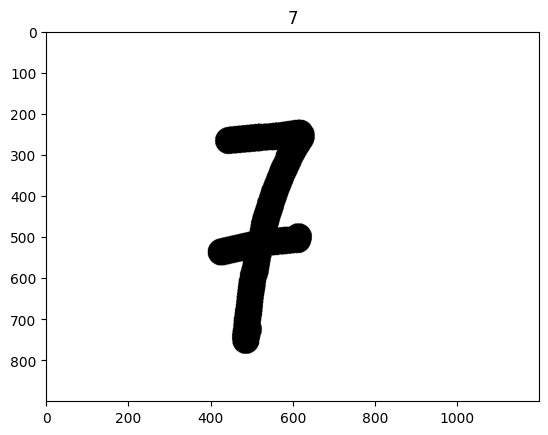

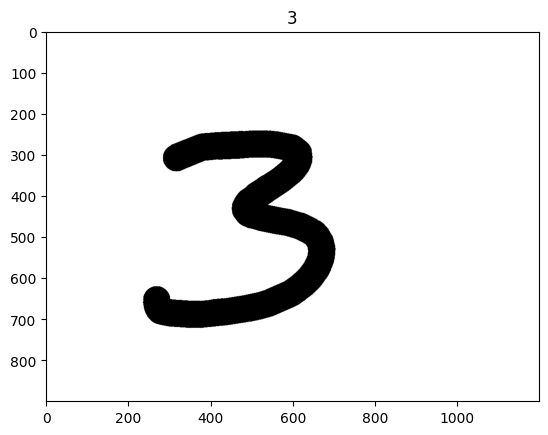

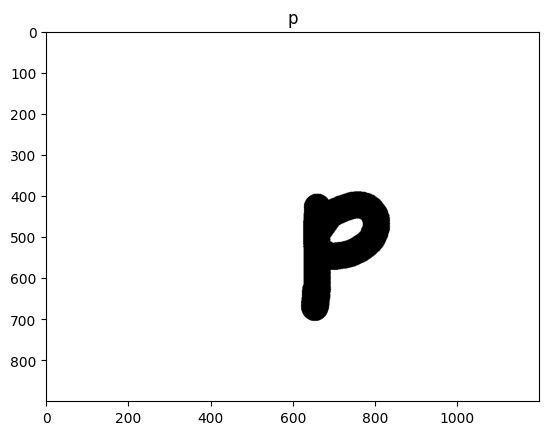

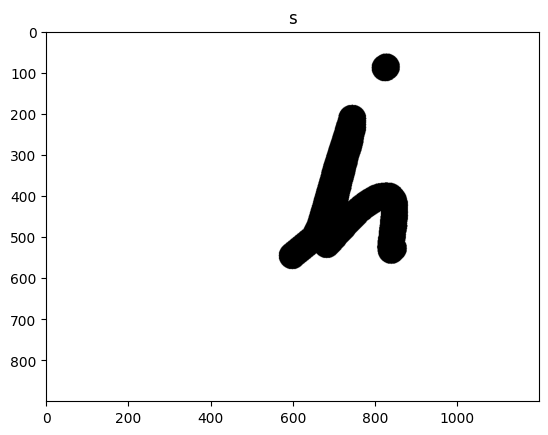

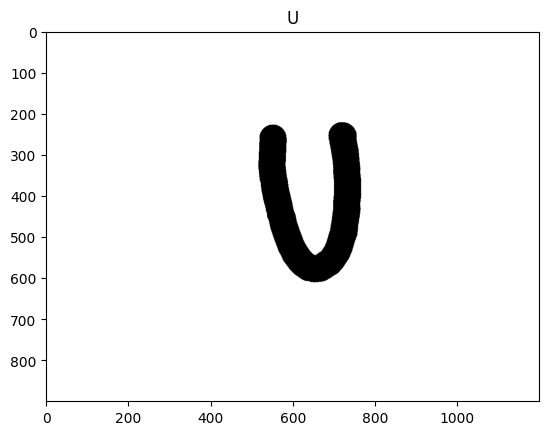

In [12]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pandas.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(data_path + '/' + test_set.at[i, 'image'])
    plt.title(switcher.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()